# 0.) Import and Clean data

In [25]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [26]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")

In [27]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [28]:
names = df[["country"]].copy()
X = df.drop("country", axis = 1)

In [29]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

/Users/vinasun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


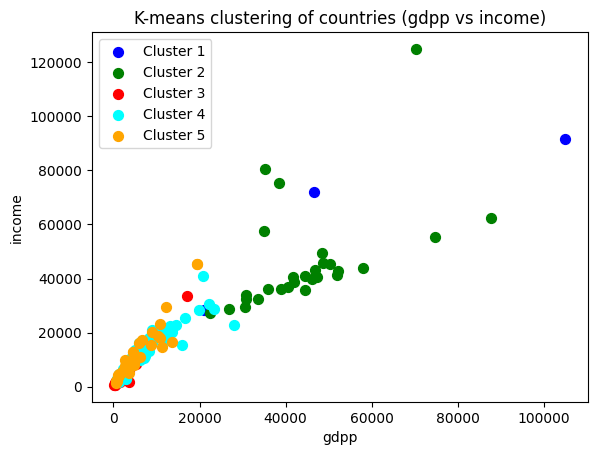

In [30]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)
y_kmeans = random_kmeans.predict(X_scaled)

# Create a scatter plot for each cluster
colors = ['blue', 'green', 'red', 'cyan', 'orange']  
for i in range(5):
    plt.scatter(df['gdpp'][y_kmeans == i], df['income'][y_kmeans == i], 
                color=colors[i], label=f'Cluster {i + 1}', s=50)

plt.title('K-means clustering of countries (gdpp vs income)')
plt.xlabel('gdpp')
plt.ylabel('income')
plt.legend(loc='upper left')
plt.show()

# 2.) Pick two features to visualize across

In [31]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

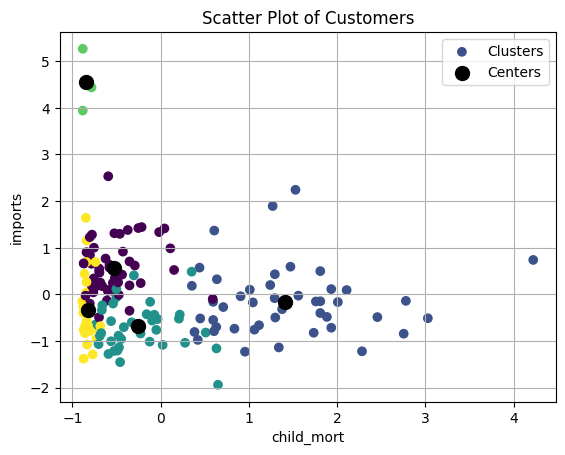

In [32]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 3


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means

Text(0, 0.5, 'WCSSs')

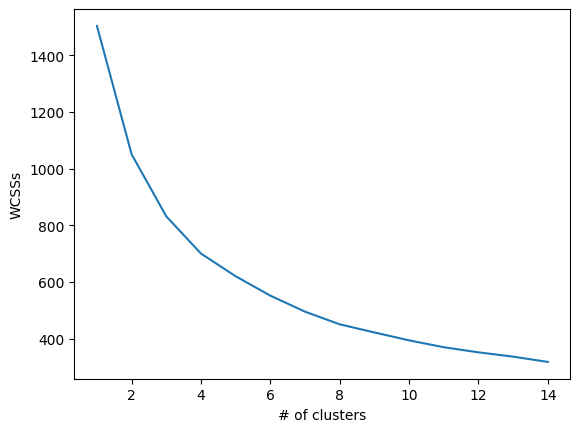

In [33]:
WCSSs = []
Ks = range(1,15)
for k in Ks:
    kmeans = KMeans(n_clusters= k, n_init = 30).fit(X_scaled)
    WCSSs.append(kmeans.inertia_)
WCSSs = [KMeans(n_clusters= k, n_init = 30).fit(X_scaled).inertia_ for k in range(1,15)]
plt.plot(Ks,WCSSs)
plt.xlabel('# of clusters')
plt.ylabel('WCSSs')

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

In [34]:
df.shape

(167, 10)

I chose 3 as chosen cluster because the elbow point is 3 and the Scatter Plot of Customers graph shows 3 would be a good choice.

/Users/vinasun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


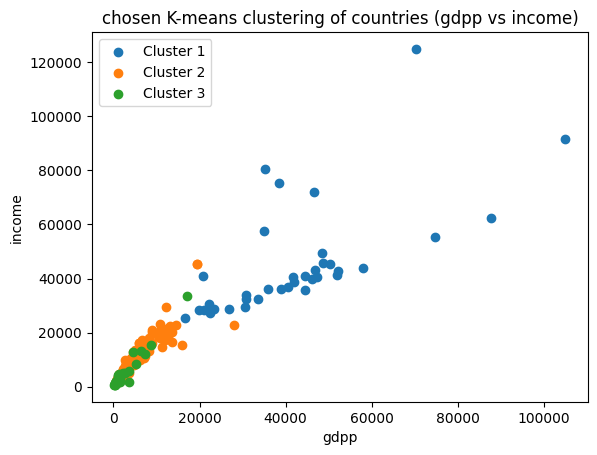

In [35]:
#choose a number of clusters
chosen_cluster = 3
chosen_kmeans = KMeans(n_clusters=chosen_cluster)
chosen_kmeans.fit(X_scaled)
y_kmeans = chosen_kmeans.predict(X_scaled)

# Create a scatter plot for each cluster
for i in range(chosen_cluster):
    plt.scatter(df['gdpp'][y_kmeans == i], df['income'][y_kmeans == i], label=f'Cluster {i + 1}')

plt.xlabel('gdpp')
plt.ylabel('income')
plt.legend(loc='upper left')
plt.title('chosen K-means clustering of countries (gdpp vs income)')
plt.show()

# 6.) Do the same for a silhoutte plot

In [36]:
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'SSs')

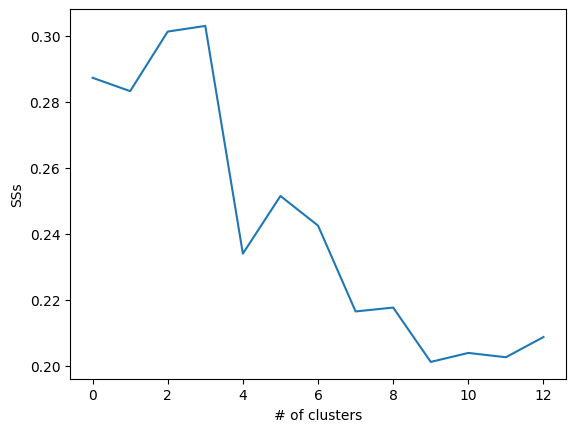

In [37]:
SSs = []
Ks = range (2,15)
for k in Ks:
    kmeans = KMeans(n_clusters= k, n_init = 30).fit(X_scaled)
    sil = silhouette_score(X_scaled,kmeans.labels_)
    SSs.append(sil)
plt.plot(SSs)
plt.xlabel('# of clusters')
plt.ylabel('SSs')

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [38]:
kmeans = KMeans(n_clusters= 2, n_init = 30).fit(X_scaled)
preds = pd.DataFrame(kmeans.labels_)
output = pd.concat([preds,df], axis = 1)
output

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,0,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,1,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,1,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,0,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [39]:
print("Cluster 1: ")
list(output.loc[output[0]==0, 'country'])

Cluster 1: 


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [40]:
print("Cluster 2: ")
list(output.loc[output[0]==1, 'country'])

Cluster 2: 


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

#### Write an observation
Cluster 1:

This cluster predominantly consists of developing countries with diverse geographic distribution but many are located in Africa and South Asia. Economically, these countries often have lower GDPs, lower income per capita, and higher rates of poverty.

Cluster 2:

This cluster contains many developed countries and emerging economies. Geographically, there's a significant representation from Europe, North America, and Asia, indicating higher economic development in these regions. These countries typically have higher GDPs, higher income per capita, and better-developed infrastructure.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [42]:
Q8DF = pd.concat([preds,X], axis =1)
Q8DF.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [43]:
Q8DF.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


# 9.) Write an observation about the descriptive statistics.

Cluster 0 (likely representing developing regions due to higher child mortality rates and lower GDP per capita):

Has high child mortality rates with a mean of approximately 76 per 1000 live births, indicating health care challenges.
Shows relatively low income and GDP per capita, reflecting lower economic development.
Exhibits lower life expectancy with a mean of approximately 62 years.
Features higher total fertility rates with a mean of approximately 4.4 children per woman, which is common in less developed regions.

Cluster 1 (likely representing more developed regions with lower child mortality rates and higher GDP per capita):

Exhibits significantly lower child mortality rates with a mean of approximately 12 per 1000 live births.
Shows much higher income and GDP per capita (mean income is about 26017 and mean GDP per capita is around 20507), which suggests more advanced economic status.
Has higher life expectancy with a mean of approximately 77 years.
Features lower total fertility rates with a mean of approximately 1.9 children per woman, which aligns with trends in developed countries.

The standard deviation values provide insight into the variance within each cluster:

Cluster 0 has a higher variance in child mortality and income, suggesting a wider range of outcomes and possibly a more diverse set of countries.
Cluster 1 has lower variance in these indicators, implying more homogeneity in terms of economic development and health outcomes within this cluster.